<a href="https://colab.research.google.com/github/angischaf/sentiment_analysis/blob/master/Tweets_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
tweets = pd.read_csv('Tweets.csv')
tweets

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [ ]:
tweets.info()

tweets.shape

tweets.airline_sentiment.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


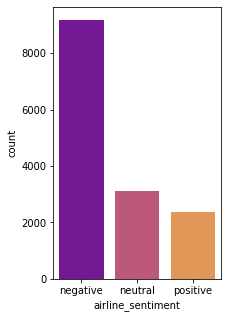

In [ ]:
plt.figure(figsize=(3,5))
sns.countplot(tweets['airline_sentiment'], order =tweets.airline_sentiment.value_counts().index,palette= 'plasma')
plt.show()

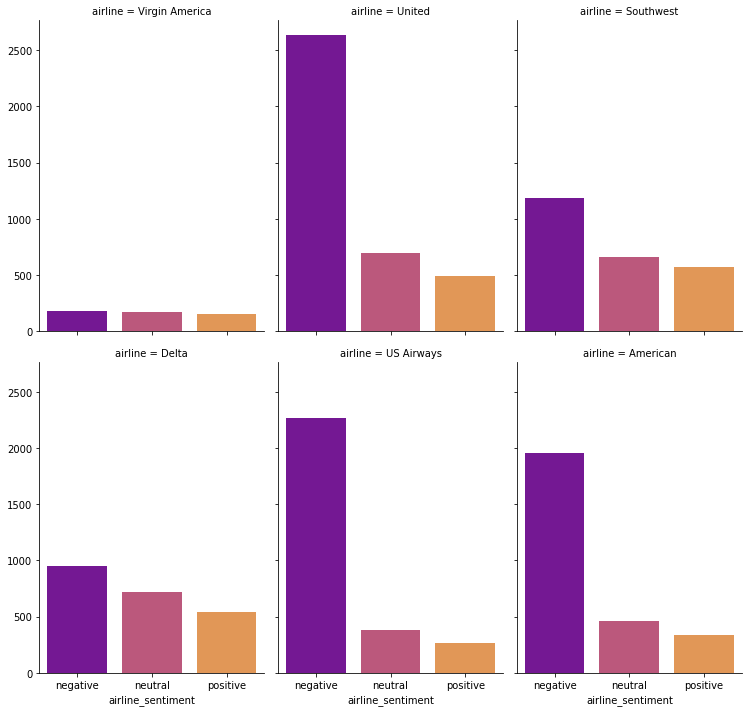

In [ ]:
g = sns.FacetGrid(tweets, col="airline", col_wrap=3, height=5, aspect =0.7)
g = g.map(sns.countplot, "airline_sentiment",order =tweets.airline_sentiment.value_counts().index, palette='plasma')
plt.show()

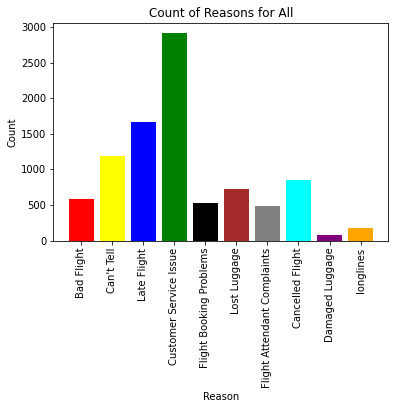

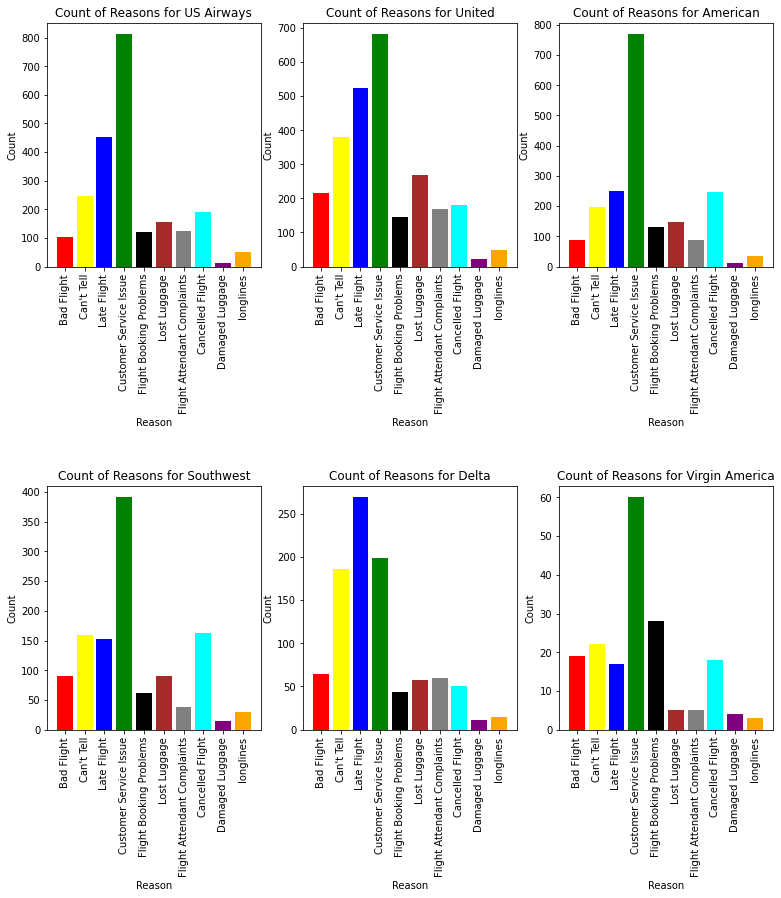

In [ ]:
#get the number of negative reasons
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
df['negativereason'].nunique()

NR_Count=dict(df['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=df
    else:
        a=df[df['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
    
def plot_reason(Airline):
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

In [ ]:
import pandas as pd
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


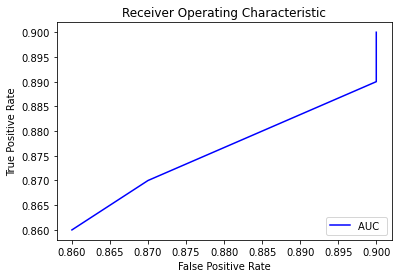

In [ ]:
#NOT ACCURATE DO NOT USE
from sklearn.metrics import auc
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_precision_recall_curve

recall = [0.86,0.87,0.90,0.90]
precision = [0.86,0.87,0.89,0.90]

auc = auc(recall, precision)
roc_auc = metrics.auc(recall, precision)

plt.title('Receiver Operating Characteristic')
plt.plot(recall, precision, 'b', label = 'AUC ' % roc_auc)
plt.legend(loc = 'lower right')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
res = pd.read_csv('results.txt')
res

,airline precision recall f1-score support
0,negative 0.90 0.98 0.94 ...
1,positive 0.90 0.59 0.71 ...
2,accuracy 0.90 ...
3,macro avg 0.90 0.79 0.83 ...
4,weighted avg 0.90 0.90 0.90 ...
5,movies_first_half
6,precision recall f1-score ...
7,negative 0.90 0.86 0.88 ...
8,positive 0.86 0.90 0.88 ...
9,accuracy 0.88 ...


In [ ]:
res.info()
print(res.columns)
print(res.head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 1 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0       airline    precision    recall  f1-score   support  19 non-null     object
dtypes: object(1)
memory usage: 280.0+ bytes
Index(['    airline    precision    recall  f1-score   support'], dtype='object')
<bound method NDFrame.head of        airline    precision    recall  f1-score   support
0       negative       0.90      0.98      0.94   ...    
1       positive       0.90      0.59      0.71   ...    
2       accuracy                           0.90   ...    
3      macro avg       0.90      0.79      0.83   ...    
4   weighted avg       0.90      0.90      0.90   ...    
5                                   movies_first_half    
6                 precision    recall  f1-score   ...    
7       negative       0.

In [ ]:
res.describe()

,airline precision recall f1-score support
count,19
unique,18
top,precision recall f1-score ...
freq,2


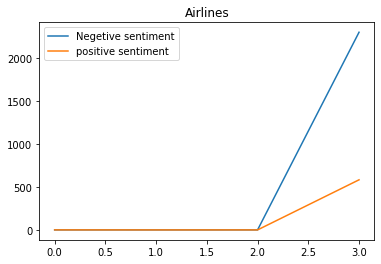

In [ ]:
neg = [0.90,0.98,0.94,2302]
pos = [0.90,0.59,0.71,584]
plt.plot(neg)
plt.plot(pos)
plt.legend(["Negetive sentiment","positive sentiment"])
plt.title("Airlines")
plt.show()

In [ ]:
##TF-IDF and Logistic Regression for Sentiment Analysis

#Sources:
#https://realpython.com/logistic-regression-python/#logistic-regression-in-python
#https://www.kaggle.com/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews
#http://martinhjelm.github.io/2017/11/12/Pandas-Replacing-Strings-In-A-Column/
#https://www.kaggle.com/codeserra09/twitter-us-airline-sentiment-lg-mnb-dt-rf-knn
#https://www.kaggle.com/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews
#documentations: pandas, nltk, sklearn

#"""

import os
import pandas as pd
import nltk  # preprocessing
from nltk import PorterStemmer, WordNetLemmatizer, re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer  # tokenization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report  # evaluation

from sklearn.metrics import roc_curve, roc_auc_score #visualization
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Change working directory to data
#os.chdir('C:/Users/Angelina/Documents/#Master/3. Semester/Advanced Data Mining & Machine Learning/0-Assignment/data')

# Preprocess data
df = pd.read_csv('Tweets.csv')  # use 'Tweets_truncated.csv' for debugging
print(df.shape, df.head())

# delete neutral sentiment
df = df[df.airline_sentiment != "neutral"]
print(df.shape, df.head())

nltk.download('stopwords')
stopwords_english = stopwords.words('english')  # words without meaning
stemmer = PorterStemmer()  # to get word stem
nltk.download('wordnet')
lemma = WordNetLemmatizer()  # get meaningful word stem


def preprocess_tweet(text):
    new_tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', text)  # remove URL
    new_tweet = re.sub(r'<[^>]+>', '', new_tweet)  # remove html (line breaks etc.)
    new_tweet = re.sub(re.compile(r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)"), '', new_tweet)  # remove email
    new_tweet = re.sub(r'#', '', new_tweet)  # remove hash sign from hashtags
    new_tweet = re.sub("[^a-zA-Z]", " ", new_tweet)  # remove remaining special characters
    words = new_tweet.lower().split()  # do lowercase, split into words
    words = [word for word in words if not word in stopwords_english]  # remove stop words
    words = [stemmer.stem(word) for word in words]  # stemming
    words = [lemma.lemmatize(word) for word in words]  # lemmatization
    # join words list back to one tweet
    return " ".join(words)


df['text'] = df['text'].apply(lambda x: preprocess_tweet(x))  # preprocess reviews
print(df.head())

# Split data in train and test data (default test_size=0.25, set random_state for reproducibility)
df_train, df_test = train_test_split(df)

# Tokenization: TF-IDF
vectorizer = TfidfVectorizer()
train = vectorizer.fit_transform(df_train['text'])  # use fit to scale training data, use this info for test data
test = vectorizer.transform(df_test['text'])

train_tfidf = pd.DataFrame(train.toarray(), columns=vectorizer.get_feature_names())  # only to view tfidf
print(vectorizer.get_feature_names())

# Classification: Logistic Regression
lr = LogisticRegression()
modellr=lr.fit(train, df_train['airline_sentiment'])  # train model

# Classification: SVM
svm_clf = svm.SVC()
modelsvm = svm_clf.fit(train, df_train['airline_sentiment'])

# Model evaluation: LR
lr_sentiment_pred = lr.predict(test)
lr_report = classification_report(df_test['airline_sentiment'], lr_sentiment_pred)
print(lr_report)  # support: nr. occurences of labels

# Model evaluation: SVM
svm_sentiment_pred = svm_clf.predict(test)
svm_report = classification_report(df_test['airline_sentiment'], svm_sentiment_pred)
print(svm_report)



(14640, 15)              tweet_id  ...               user_timezone
0  570306133677760513  ...  Eastern Time (US & Canada)
1  570301130888122368  ...  Pacific Time (US & Canada)
2  570301083672813571  ...  Central Time (US & Canada)
3  570301031407624196  ...  Pacific Time (US & Canada)
4  570300817074462722  ...  Pacific Time (US & Canada)

[5 rows x 15 columns]
(11541, 15)              tweet_id  ...               user_timezone
1  570301130888122368  ...  Pacific Time (US & Canada)
3  570301031407624196  ...  Pacific Time (US & Canada)
4  570300817074462722  ...  Pacific Time (US & Canada)
5  570300767074181121  ...  Pacific Time (US & Canada)
6  570300616901320704  ...  Pacific Time (US & Canada)

[5 rows x 15 columns]
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
             tweet_id  ...               user_timezo

In [ ]:
#LR IMDB
from sklearn.metrics import accuracy_score
print('Twitter Airlines Dataset')
accLR = accuracy_score(df_test['airline_sentiment'], lr_sentiment_pred)
print('LR:')
print(accLR)
#SVM IMDB
accSVM = accuracy_score(df_test['airline_sentiment'], svm_sentiment_pred)
print('SVM:')
print(accSVM)

Twitter Airlines Dataset
LR:
0.9047124047124047
SVM:
0.9123354123354124


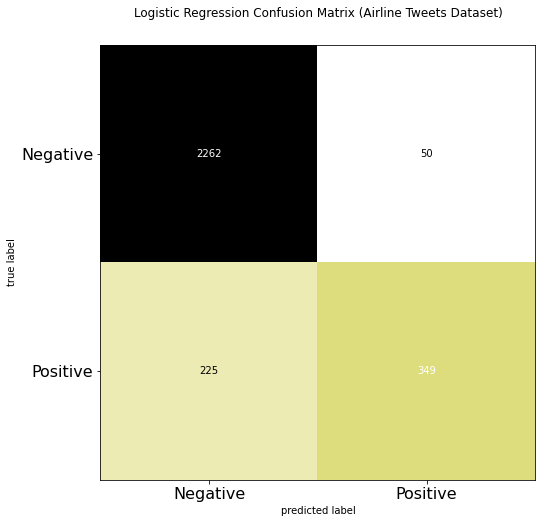

In [ ]:
#LR Confusion Matrix
from sklearn.metrics import confusion_matrix
import pandas as pd

tweets = pd.read_csv('Tweets.csv')
tweets
cm=confusion_matrix(df_test['airline_sentiment'], lr_sentiment_pred)
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks= True, cmap=plt.cm.gist_stern_r)
plt.title('Logistic Regression Confusion Matrix (Airline Tweets Dataset)')
plt.xticks(range(2), ['Negative','Positive'], fontsize=16)
plt.yticks(range(2), ['Negative','Positive'], fontsize=16)
plt.show()

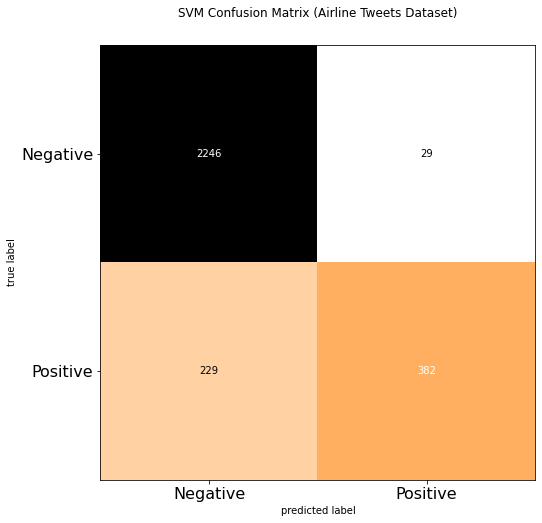

In [ ]:
#SVM Confusion Matrix
from sklearn.metrics import confusion_matrix
tweets = pd.read_csv('Tweets.csv')
tweets
cm=confusion_matrix(df_test['airline_sentiment'], svm_sentiment_pred)
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.gist_heat_r)
plt.title('SVM Confusion Matrix (Airline Tweets Dataset)')
plt.xticks(range(2), ['Negative', 'Positive'], fontsize=16,color='black')
plt.yticks(range(2), ['Negative', 'Positive'], fontsize=16)
plt.show()

MOVIE REVIEWS

In [ ]:
import pandas as pd
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


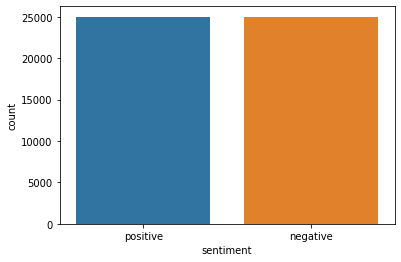

<Figure size 360x360 with 0 Axes>

In [ ]:
import seaborn as sns
sns.countplot(x ='sentiment', data = df)
plt.figure(figsize=(5,5))
plt.show()

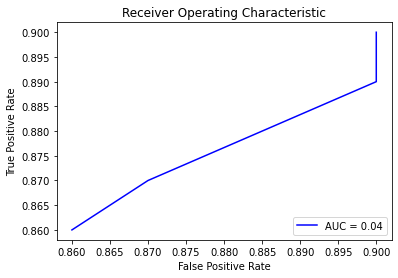

In [ ]:
from sklearn.metrics import auc
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_precision_recall_curve
recall = [0.86,0.87, 0.90,0.90]
precision = [0.86,0.87,0.89,0.90]
auc = auc(recall, precision)

roc_auc = metrics.auc(recall,precision)
plt.title('Receiver Operating Characteristic')
plt.plot(recall,precision, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


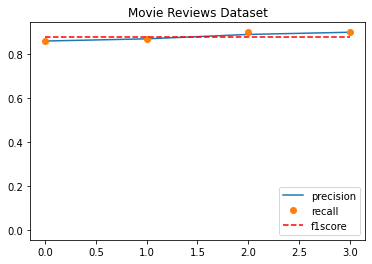

In [ ]:
#Movie Reviews
precision = [0.86,0.87,0.89,0.90]
recall = [0.86,0.87, 0.90,0.90]
f1score = [0.88,0.88,0.88,0.88]
plt.title("Movie Reviews Dataset")
plt.plot(precision)
plt.plot(recall, "o")
plt.plot(f1score, "r--")
plt.plot(range(0,1))
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.legend(["precision","recall","f1score"])
plt.show()

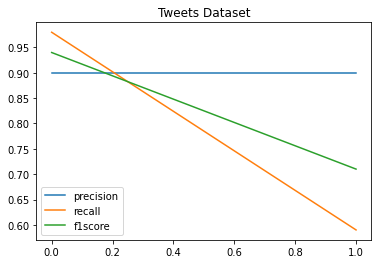

In [ ]:
#Airline Tweets
precision = [0.90,0.90]
recall = [0.98,0.59]
f1score = [0.94,0.71]
plt.title("Tweets Dataset")
plt.plot(precision)
plt.plot(recall)
plt.plot(f1score)
plt.legend(["precision","recall","f1score"])
plt.show()